In [1]:
import json
import re
import nltk
import emoji
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from pysentimiento.preprocessing import preprocess_tweet

## Corpus SENT-COVID

In [2]:
with open('data/SENT-COVID.json') as file:
    data = json.load(file)
    
pd.options.mode.chained_assignment = None                                         
pd.set_option('display.max_colwidth',None)   


df = pd.DataFrame(data)
print('Numero de tweets: ' + str(len(df)))
df.head()

Numero de tweets: 4594


,Label,Tweet,id
0,NEUTRO,-@dulcema201 @BronstonRaqsa02 Protocolo de COVID !!!!,1401047081121353728
1,NEUTRO,-#COVID19 #QuedateEnCasa en Morelia Centro,1258159310162595843
2,POSITIVO,-México va en en aumento con el #Covid_19. Tal vez no tengamos la estabilidad de Europa o estados unidos. Para mantener 120 días en paro total. Pero podemos ser precavidos al usar la #SanaDistancia,1272748988626862082
3,NEUTRO,-@sororavirus Creo en todo y nada. 💜,1349385638722883585
4,NEGATIVO,-@GobiernoMX había prometido 389,1360615587114844161


## Preprocesamiento

In [3]:
def clean_tweet(text):
  text = re.sub(r'[~^0-9]', '', text) #numeros
  text = re.sub("\\s+", ' ', text) ##Espacios blancos dobles
  text = re.sub('\n', ' ', text) ##Saltos de linea

  pattern = r'([.])([A-Z#@¿])'
  pattern2 = r'([-?])([a-zA-Z#@¿])'
  pattern3 = r'([a-zA-Z])([#@¿(])'
  pattern4 = r'([:!])([a-zA-Z#@¿])'
  text = re.sub(pattern, r'\1 \2', text) # Separacion de punto seguido por una mayuscula
  text = re.sub(pattern2, r'\1 \2', text)
  text = re.sub(pattern3, r'\1 \2', text)
  text = re.sub(pattern4, r'\1 \2', text)
  return text 


def preprocess(text):  # Preprocesamiento de pysentimiento   
  return preprocess_tweet(text, char_replace=True, normalize_laughter=True, shorten=2, 
                          emoji_wrapper='', user_token='', url_token='')  


def normalize(text):
 pattern2 = r'([a-zA-Z])([.])'
 pattern3 = r'([.])([a-zA-Z])'
 text = re.sub(pattern2, r'\1 \2', text)
 text = re.sub(pattern3, r'\1 \2', text)
 
 text = "".join(u for u in text if u not in ("?","¿", ".", ";", ":", "!","¡",'"',"%","“","”","$","&","'","\\", "(",")",
                                             "*","+",",","/","<",">","=","^","•","...", "ç","π","ⓘ", "-", "_","#","|"))
 a,b = 'áéíóúÁÉÍÓÚ','aeiouAEIOU'
 trans = str.maketrans(a,b)     
 text = text.translate(trans) # Reemplazo de palabras acentuadas       

 pattern  = r'([a-z])([A-Z-])'
 text = re.sub(pattern, r'\1 \2', text)

 #text = re.sub(r'@[A-Za-z0-9_]+', '', text)
 text = text.lower()
 return text  


def tokenize(text):    
  text= text.split(sep = ' ')  # Tokenización por palabras individuales
  text= [token for token in text if len(token) > 1]  # Eliminación de tokens con una longitud < 2
  return(text) 

def labels(label):
  if label == 'POSITIVO':
    label=1
  elif label == 'NEUTRO':
     label=0
  else:
     label=-1
  return(label) 

In [4]:
df['clean_tweet'] = df['Tweet'].apply(clean_tweet) 
df['preprocess_tweet'] = df['clean_tweet'].apply(preprocess)
df['norm_tweet'] = df['preprocess_tweet'].apply(normalize)
df['tokenized_tweet'] = df['norm_tweet'].apply(tokenize)
df['class'] = df['Label'].apply(labels)

df[['Tweet','norm_tweet','Label']][195:205]

,Tweet,norm_tweet,Label
195,"-""Se 'olvidan' del COVID-19 y realizan fiestas patronales en el ejido La Paz de Torreón https://t.co/Yu6zNCfwnz""",se olvidan del covid y realizan fiestas patronales en el ejido la paz de torreon,NEGATIVO
196,-@papaesceptico El Pfizer de Bill Gates. https://t.co/rW46FFtUfO,el pfizer de bill gates,NEUTRO
197,-#frases #humor #frasesdealegria #Meme #Mujeres #parejas #hombres #atraccion #pervertidos #relaciones #Sexo #orgasmos #inteligente #cuarentena #ligar #tinder en Guadalajara,frases humor frasesdealegria meme mujeres parejas hombres atraccion pervertidos relaciones sexo orgasmos inteligente cuarentena ligar tinder en guadalajara,NEUTRO
198,"-""@Xuanto @AbbyChavez79 @almaldo2 @hdemauleon Más vale acostumbrarnos a la nueva realidad. En México y en el mundo este canijo virus seguirá cobrando vidas humanas por buen rato; afortunadamente cada día se sabe más sobre el Covid-19. Algún día habrá vacuna. #QuedateEnCasa#SusanaDistancia#YolecreoaGatell""",mas vale acostumbrarnos a la nueva realidad en mexico y en el mundo este canijo virus seguira cobrando vidas humanas por buen rato afortunadamente cada dia se sabe mas sobre el covid algun dia habra vacuna quedate en casa susana distancia yolecreoa gatell,POSITIVO
199,-@MollinedOficial Muy bien hermosa pero y en México cuando acabarán con la famosa vacuna https://t.co/gup4NDoLGi,muy bien hermosa pero y en mexico cuando acabaran con la famosa vacuna,NEUTRO
200,-12:04 Policías de la Secretaría de Seguridad Ciudadana realizan recorridos con Perifoneo en Av. Miguel Ángel de Quevedo y Melchor Ocampo,policias de la secretaria de seguridad ciudadana realizan recorridos con perifoneo en av miguel angel de quevedo y melchor ocampo,POSITIVO
201,-Coma post empanada,coma post empanada,NEUTRO
202,-#DosAñosConRumbo ✌️🟠 #SNTEsalud ⚕️ y #CoronaTips 💡 se han convertido en referente y aporte #SNTE en la lucha ante la #COVID19 🦠 en una acción de corresponsabilidad socialCon el #SNTE al 💯👉#UnoSomosTodos #TodosSomosUno ✔️Ver documento 👉 https://t.co/H83riKLNLu https://t.co/FBYx4b1Eit,dos años con rumbo mano con señal de victoria circulo naranja sntesalud simbolo de medicina y corona tips bombilla se han convertido en referente y aporte snte en la lucha ante la covid microbio en una accion de corresponsabilidad social con el snte al cien puntos dorso de mano con indice a la derecha uno somos todos todos somos uno marca de verificacion ver documento dorso de mano con indice a la derecha,POSITIVO
203,-#50reglasdeoro #Número35 #CuidaTuSalud #FelizDimingo #QuedateenCasa #BuenDomingo #SanaDistancia #JuntosporlaSalud #Xalapa #devozenvozmx #FelizDíaDelPadre https://t.co/xAsVf3IOtn,reglasdeoro numero cuida tu salud feliz dimingo quedateen casa buen domingo sana distancia juntosporla salud xalapa devozenvozmx feliz dia del padre,POSITIVO
204,-En Coahuila se reforzarán las medidas para que se respeten los protocolos sanitarios y prevenir un posible incremento en los contagios por Covid19 por la temporada vacacional y ante el repunte de la pandemia que se registra en el País,en coahuila se reforzaran las medidas para que se respeten los protocolos sanitarios y prevenir un posible incremento en los contagios por covid por la temporada vacacional y ante el repunte de la pandemia que se registra en el pais,POSITIVO


## Lemmatizacion

In [5]:
import spacy
from nltk.stem.snowball import SnowballStemmer

sp = spacy.load('es_core_news_sm')

def lemmatization(text):
    doc = sp(text)
    return ' '.join([word.lemma_ for word in doc]) 

#stemmer = SnowballStemmer('spanish')
#stemmed_spanish = [stemmer.stem(item) for item in spanish_words]

In [6]:
df['lem_tweet'] = df['norm_tweet'].apply(lemmatization)
df['lemtokenized_tweet'] = df['lem_tweet'].apply(tokenize)
df[['Label', 'norm_tweet','lem_tweet','tokenized_tweet','lemtokenized_tweet']][100:110]

,Label,norm_tweet,lem_tweet,tokenized_tweet,lemtokenized_tweet
100,NEGATIVO,esos hermanos negrete una bola de vividores,ese hermano negretir uno bola de vividor,"[esos, hermanos, negrete, una, bola, de, vividores]","[ese, hermano, negretir, uno, bola, de, vividor]"
101,NEUTRO,esta en crisis la crisis,este en crisis el crisis,"[esta, en, crisis, la, crisis]","[este, en, crisis, el, crisis]"
102,NEGATIVO,uff cara triste pero aliviada microbio microbio quedate en casa casa con jardin coahuila mexico cara llorando,uff cara triste pero aliviado microbio microbio quedate en casa casa con jardin coahuila mexico caro llorar,"[uff, cara, triste, pero, aliviada, microbio, microbio, quedate, en, casa, casa, con, jardin, coahuila, mexico, cara, llorando]","[uff, cara, triste, pero, aliviado, microbio, microbio, quedate, en, casa, casa, con, jardin, coahuila, mexico, caro, llorar]"
103,NEUTRO,no se que tanto maman con lady vacuna,no él que tanto mamar con lady vacuna,"[no, se, que, tanto, maman, con, lady, vacuna]","[no, él, que, tanto, mamar, con, lady, vacuna]"
104,NEUTRO,ojo,ojo,[ojo],[ojo]
105,NEUTRO,hoy en el programa versiones raras,hoy en el programa versión rara,"[hoy, en, el, programa, versiones, raras]","[hoy, en, el, programa, versión, rara]"
106,NEUTRO,hoy participamos nuevamente para el programa de opinion yo creo,hoy participamos nuevamente para el programa de opinion yo creer,"[hoy, participamos, nuevamente, para, el, programa, de, opinion, yo, creo]","[hoy, participamos, nuevamente, para, el, programa, de, opinion, yo, creer]"
107,NEUTRO,flexibilidad,flexibilidad,[flexibilidad],[flexibilidad]
108,POSITIVO,dios los cuide y les conceda una pronta recuperacion y que cuide y bendiga a aquellos que aun no han presentado sintomas de contagio,dio él cuide y él concedar uno pronto recuperacion y que cuidir y bendiga a aquel que aun no haber presentar sintoma de contagio,"[dios, los, cuide, les, conceda, una, pronta, recuperacion, que, cuide, bendiga, aquellos, que, aun, no, han, presentado, sintomas, de, contagio]","[dio, él, cuide, él, concedar, uno, pronto, recuperacion, que, cuidir, bendiga, aquel, que, aun, no, haber, presentar, sintoma, de, contagio]"
109,NEGATIVO,y las sanciones para y por el terrible manejo de la crisis que,y el sanción para y por el terrible manejo de el crisis que,"[las, sanciones, para, por, el, terrible, manejo, de, la, crisis, que]","[el, sanción, para, por, el, terrible, manejo, de, el, crisis, que]"


## Stopwords

In [7]:
from nltk.corpus import stopwords

# Obtención de listado de stopwords del español
stop_words_esp = list(stopwords.words('spanish'))
my_stop_words = stop_words_esp[:100]


def remove_stopwords(text):
    text = [w for w in text if not w in stop_words_esp]
    return text

df['normsw_tweet'] = df['norm_tweet'].apply(remove_stopwords)
df['lemsw_tweet'] = df['lem_tweet'].apply(remove_stopwords)
df['normtoksw_tweet'] = df['tokenized_tweet'].apply(remove_stopwords)
df['lemtoksw_tweet'] = df['lemtokenized_tweet'].apply(remove_stopwords)

print(stop_words_esp[0:20])
len(stop_words_esp)


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo']


313

## Train test 

In [11]:
from sklearn.model_selection import train_test_split

X1 = df['norm_tweet']          #Tweets normalizados
X2 = df['lem_tweet']           #Tweets lemmatizados
X3 = df['tokenized_tweet']     #Normalizados y tokenizados
X4 = df['lemtokenized_tweet']  #Lemmatizados y tokenizados 
X5 = df['normtoksw_tweet']     #Normalizados, tokenizados y sin stopwords
X6 = df['lemtoksw_tweet']      #Lemmatizados, tokenizados y sin stopwords 
y = df['Label']                #Etiquetas

SEED = 37
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.22 ,random_state=SEED)
len(X_train), len(X_test)

(3583, 1011)

In [9]:
value, counts = np.unique(y_train, return_counts=True)
print(f"y_train: {dict(zip(value, 100 * counts / sum(counts)))}")
value, counts = np.unique(y_test, return_counts=True)
print(f"y_test: {dict(zip(value, 100 * counts / sum(counts)))}")

y_train: {'NEGATIVO': 33.910131174993026, 'NEUTRO': 44.90650293050516, 'POSITIVO': 21.183365894501815}
y_test: {'NEGATIVO': 34.124629080118694, 'NEUTRO': 44.41147378832839, 'POSITIVO': 21.46389713155292}


## Accuracy Chekers

### Checker

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(X_test[y_test == 0]) / (len(X_test)*1.) > 0.5:
        null_accuracy = len(X_test[y_test == 0]) / (len(X_test)*1.)
    else:
        null_accuracy = 1. - (len(X_test[y_test == 0]) / (len(X_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time
    
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(1000,10001,9000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

### Stopwords

In [ ]:
print("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words=stop_words_esp)
print("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker()
print("RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)\n")
feature_result_wocsw = nfeature_accuracy_checker(stop_words=my_stop_words)

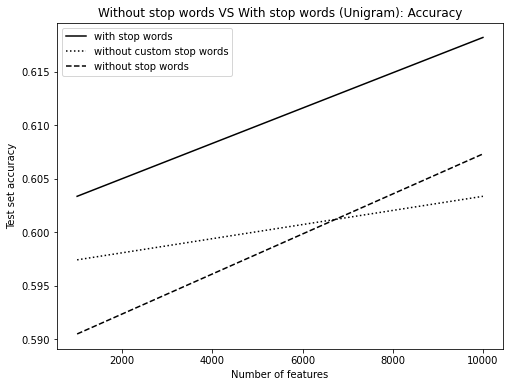

In [17]:
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wocsw = pd.DataFrame(feature_result_wocsw,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wosw = pd.DataFrame(feature_result_wosw,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='with stop words', color='black')
plt.plot(nfeatures_plot_ug_wocsw.nfeatures, nfeatures_plot_ug_wocsw.validation_accuracy,label='without custom stop words', ls='dotted', color='black')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy,label='without stop words', ls='dashed', color='black')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Test set accuracy")
plt.legend()

### n-grams

In [ ]:
print("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))
print("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

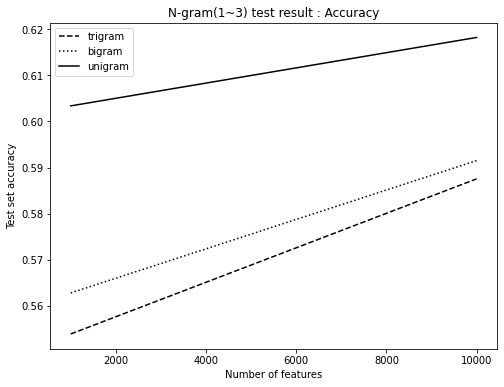

In [453]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram',ls='dashed', color='black')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram', ls='dotted', color='black')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram', color='black')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Test set accuracy")
plt.legend()

### Tfidf vs CountVec

LogisticRegression()


Validation result for 1000 features
null accuracy: 55.59%
accuracy score: 60.83%
model is 5.24% more accurate than null accuracy
train and test time: 0.56s
--------------------------------------------------------------------------------
Validation result for 10000 features
null accuracy: 55.59%
accuracy score: 60.83%
model is 5.24% more accurate than null accuracy
train and test time: 0.76s
--------------------------------------------------------------------------------
LogisticRegression()


Validation result for 1000 features
null accuracy: 55.59%
accuracy score: 58.46%
model is 2.87% more accurate than null accuracy
train and test time: 0.55s
--------------------------------------------------------------------------------
Validation result for 10000 features
null accuracy: 55.59%
accuracy score: 58.85%
model is 3.26% more accurate than null accuracy
train and test time: 1.11s
--------------------------------------------------------------------------------
Logi

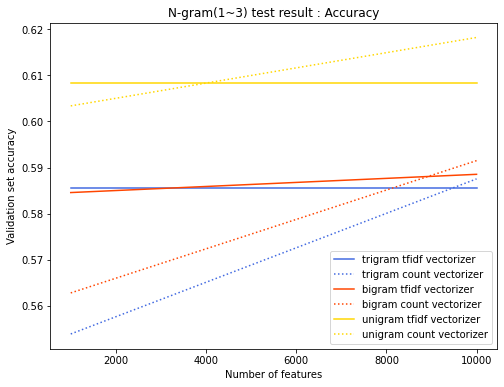

In [417]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))


nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

_______________________________________________________________________________________________
## Vectorizaciones 

### Tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=3, ngram_range=(1,2), stop_words = stop_words_esp).fit(X_train)
                        
print('Numero de features: ' +str(len(tfidf.get_feature_names_out())))
tfidf.fit(X_train)

Numero de features: 2807


TfidfVectorizer(min_df=3, ngram_range=(1, 2),
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...])

In [ ]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)
X_train_tfidf 

<3445x2807 sparse matrix of type '<class 'numpy.float64'>'
	with 30268 stored elements in Compressed Sparse Row format>

### Countvectorizer

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

countvect = CountVectorizer(min_df=1, stop_words = None, ngram_range=(1,1)).fit(X2)
print('Numero de features: ' +str(len(countvect.get_feature_names_out())))
print(f"Número de tokens creados: {len(countvect.get_feature_names_out())}")

X_cv = countvect.transform(X2)
X_train_cv = countvect.transform(X_train)
X_test_cv  = countvect.transform(X_test)

feature_names = np.array(countvect.get_feature_names_out())
sorted_index = X_train_cv.max(0).toarray()[0].argsort()

Numero de features: 9546
Número de tokens creados: 9546


In [38]:
mat = X_cv.toarray()
matX = pd.DataFrame(mat)
matXY = pd.concat([matX, y, df['class']], axis=1)
matXY.to_csv('data/x_countvec.csv')

In [399]:
X=X_cv.toarray()
means=np.mean(X,axis=0)
std_devs=np.std(X,axis=0)

outliers=np.sort(np.where(means>0.05))

outs=countvect.get_feature_names_out()[[ 314, 1373, 1374, 1425, 1870, 1930, 2196, 2312, 2466, 2538, 3106,
        3186, 3469, 3478, 4181, 4207, 4812, 5419, 5480, 5655, 5671, 6059,
        6395, 6425, 6723, 6891, 7260, 8038, 8106, 8346, 8587, 8710, 8734,
        8897, 8946, 9001, 9071, 9432, 9453, 9521]]

print(outliers)
print(outs)
print(f" Número de tokens creados: {len(tfidf.get_feature_names_out())}")
countvect.get_feature_names_out()


[[ 314 1373 1374 1425 1870 1930 2196 2312 2466 2538 3106 3186 3469 3478
  4181 4207 4812 5419 5480 5655 5671 6059 6395 6425 6723 6891 7260 8038
  8106 8346 8587 8710 8734 8897 8946 9001 9071 9432 9453 9521]]
['al' 'car' 'cara' 'casa' 'como' 'con' 'covid' 'cuarentena' 'de' 'del'
 'el' 'en' 'estar' 'este' 'haber' 'hacer' 'ir' 'mano' 'mas' 'mexico' 'mi'
 'no' 'pandemia' 'para' 'piel' 'por' 'que' 'ser' 'si' 'su' 'tener' 'todo'
 'tono' 'tu' 'tú' 'uno' 'vacuna' 'ya' 'yo' 'él']


### Word embedding

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
from gensim.models import FastText

wordvectors_file = 'data/wiki.es.vec'
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file, limit=600000)

#embedding=200
#w2v = Word2Vec(X6, min_count=3, vector_size=embedding, window=5, sg=1 )
#w2v.train(X6, total_examples= len(df['lem_tweet']), epochs=20)

#wordvectors.most_similar('pozole')

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += wordvectors[word].reshape((1, size))
            count += 1.
        except KeyError:  
            continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(X6), 300)) 
for i in range(len(X6)):
    wordvec_arrays[i,:] = word_vector(X6[i], 300)
    
X_w2v = pd.DataFrame(wordvec_arrays)
X_w2v.shape

(4594, 300)

In [482]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils

def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t.split(), [prefix + '_%s' % i]))
    return result
  
all_x = pd.concat([X_train, X_test])
all_x_w2v = labelize_tweets_ug(all_x, 't')

## Reduccion de dimension

### chi2

Text(0.5, 0, '$\\chi^2$')

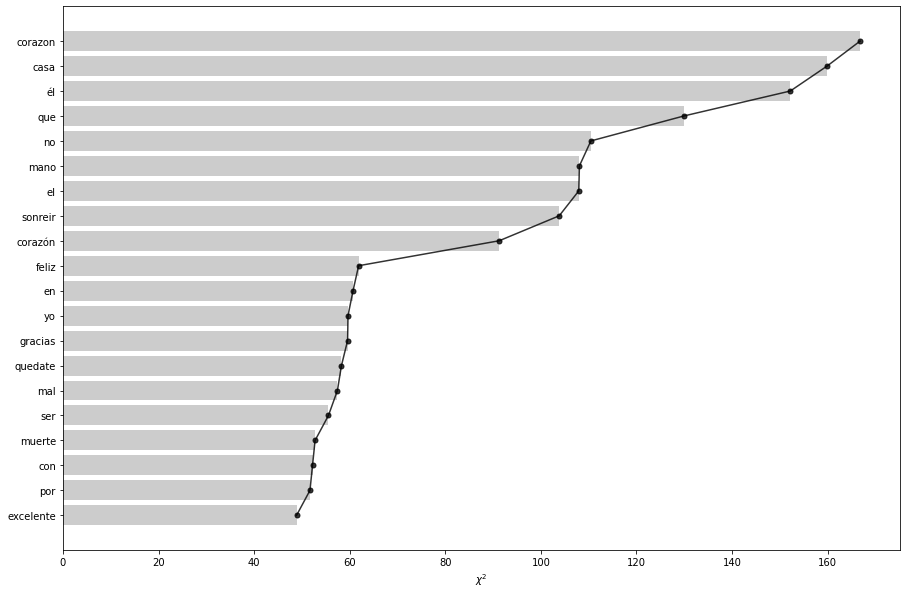

In [9]:
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(max_features=10000,ngram_range=(1, 1))
X_train_cv = cvec.fit_transform(X_train)
X_test_cv = cvec.transform(X_test)
chi2score = chi2(X_train_cv, y_train)[0]

plt.figure(figsize=(15,10))
wscores = zip(cvec.get_feature_names_out(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2, color='black')
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8, color='black')
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
ch2_result = []
for n in np.arange(1000,10000,9000):
    ch2 = SelectKBest(chi2, k=n)
    X_train_chi2_selected = ch2.fit_transform(X_train_cv, y_train)
    X_test_chi2_selected = ch2.transform(X_test_cv)
    clf = LogisticRegression(C=0.5)
    clf.fit(X_train_chi2_selected, y_train)
    score = clf.score(X_test_chi2_selected, y_test)
    ch2_result.append(score)
    print("chi2 feature selection evaluation calculated for {} features".format(n))

chi2 feature selection evaluation calculated for 1000 features


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy,label='Unigram CountVectorizer',color='black')
plt.plot(np.arange(1000,10000,9000), ch2_result,label='Dimesions reduced from 10,000 features',linestyle=':', color='black')

plt.title("features limited within CountVectorizer VS reduced dimensions with Chi2")
plt.xlabel("Number of features")
plt.ylabel("Test set accuracy")
plt.legend()

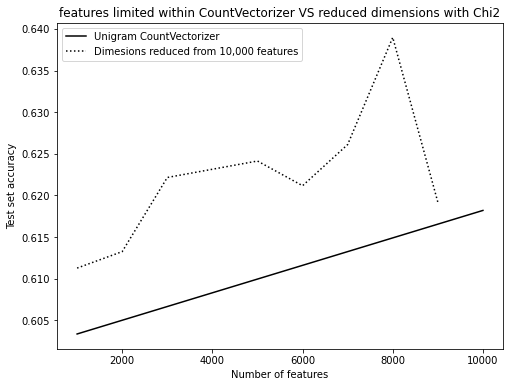

In [454]:
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy,label='Unigram CountVectorizer',color='black')
plt.plot(np.arange(1000,10000,1000), ch2_result,label='Dimesions reduced from 10,000 features',linestyle=':', color='black')

plt.title("features limited within CountVectorizer VS reduced dimensions with Chi2")
plt.xlabel("Number of features")
plt.ylabel("Test set accuracy")
plt.legend()

### SVD

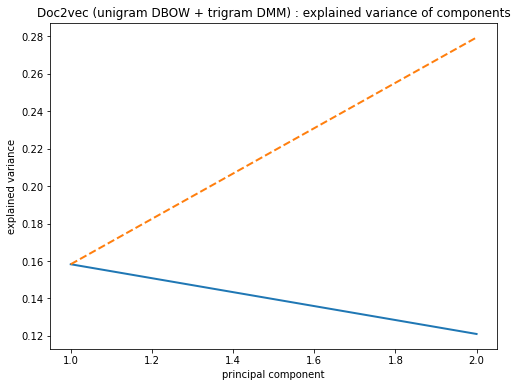

In [450]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD


cvec = CountVectorizer(ngram_range=(1, 1))
X_train_cv = cvec.fit_transform(X_train)
X_test_cv = cvec.transform(X_test)
pca = TruncatedSVD().fit(X_train_cv)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components+1)
ax.plot(x_values, pca.explained_variance_ratio_, lw=2, label='explained variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='cumulative explained variance', linestyle='dashed')
ax.set_title('Doc2vec (unigram DBOW + trigram DMM) : explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

In [53]:

svd1 = TruncatedSVD(n_components=2000)
# prepare transform on dataset
svd1.fit(X_cv)
# apply transform to dataset
transformed = svd1.transform(X_cv)

In [59]:


mat_ = transformed
matX_ = pd.DataFrame(mat_)
matXY_ = pd.concat([matX_, y, df['class']], axis=1)
matXY_.to_csv('data/x_svd.csv')

### TruncatedSVD

Number of components = 4 and explained variance = 0.33260701772896745
Number of components = 10 and explained variance = 0.42962902004241693
Number of components = 15 and explained variance = 0.47373499348358905
Number of components = 20 and explained variance = 0.5042412936935551
Number of components = 50 and explained variance = 0.6042954211592336
Number of components = 100 and explained variance = 0.6714042078708693
Number of components = 150 and explained variance = 0.7121934386899887
Number of components = 200 and explained variance = 0.7422312887390566
Number of components = 500 and explained variance = 0.8393161011644913
Number of components = 700 and explained variance = 0.8745740067162063
Number of components = 800 and explained variance = 0.888257446964148
Number of components = 900 and explained variance = 0.9000751166365816
Number of components = 1000 and explained variance = 0.9104385866303467
Number of components = 1500 and explained variance = 0.9472045086333588
Number o

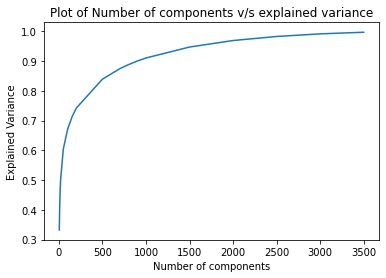

In [31]:
# Program to find the optimal number of components for Truncated SVD
n_comp = range(10,3000, 500) # list containing different values of components
explained = [] # explained variance ratio for each component of Truncated SVD
for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(X_cv)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd.explained_variance_ratio_.sum()))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
 
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(1500,2001,100):
  steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
  models[str(i)] = Pipeline(steps=steps)
  return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
 scores = cross_val_score(model, X_cv, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X_cv, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

>1500 0.618 (0.029)


In [61]:
results

[array([0.60434783, 0.60869565, 0.65869565, 0.6       , 0.60348584,
        0.65577342, 0.66884532, 0.59694989, 0.57298475, 0.59041394])]

In [ ]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

### GridSearch

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [10, 1, 0.5, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_cv, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## MLP

In [434]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

X_train_scaled = scaler.fit_transform(X_train_cv)
X_test_scaled = scaler.transform(X_test_cv)

In [435]:
from sklearn.neural_network import MLPClassifier

units = [100,100]
alfa = float(4.0)
mlp = MLPClassifier(hidden_layer_sizes=units, solver='adam', activation='tanh', alpha=alfa, random_state=37)
mlp.fit(X_train_cv, y_train)

mlp.predict(X_test_cv)
mlp.score(X_test_cv,y_test)


0.6300692383778437

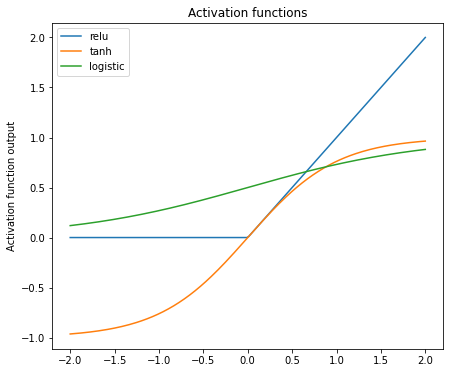

In [68]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))
plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Activation functions')
plt.ylabel('Activation function output')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'activation':['relu', 'tanh', 'logistic'], 'alpha':[0.1, 1, 3, 5,10]}


clf = GridSearchCV(MLPClassifier(validation_fraction=0), 
                    params,
                    scoring='accuracy',
                    verbose=True)

clf.fit(X_train_cv ,y_train)